<a href="https://colab.research.google.com/github/mchoirulbahriadzimi/DETEKSI_OBJEK/blob/main/uts_visi_komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔼 Upload 1 gambar logam CACAT...


Saving download (1).jpeg to download (1).jpeg
🔼 Upload 1 gambar logam NORMAL...


Saving images (7).jpeg to images (7).jpeg


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🚀 Melatih model...
Epoch 1/10
1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 0.7355 - val_accuracy: 0.0000e+00 - val_loss: 1.0355
Epoch 2/10
1/1 - 0s - 193ms/step - accuracy: 1.0000 - loss: 0.5877 - val_accuracy: 0.0000e+00 - val_loss: 1.6774
Epoch 3/10
1/1 - 0s - 197ms/step - accuracy: 1.0000 - loss: 0.3235 - val_accuracy: 0.0000e+00 - val_loss: 2.4159
Epoch 4/10
1/1 - 0s - 174ms/step - accuracy: 1.0000 - loss: 0.0451 - val_accuracy: 0.0000e+00 - val_loss: 3.1021
Epoch 5/10
1/1 - 0s - 184ms/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.0000e+00 - val_loss: 3.7533
Epoch 6/10
1/1 - 0s - 300ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.0000e+00 - val_loss: 4.3643
Epoch 7/10
1/1 - 0s - 282ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.0000e+00 - val_loss: 4.9286
Epoch 8/10
1/1 - 0s - 315ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 5.4469
Epoch 9/10
1/1 - 0s - 187ms/step - accuracy: 1.0000 - loss: 0.0139 - val_ac

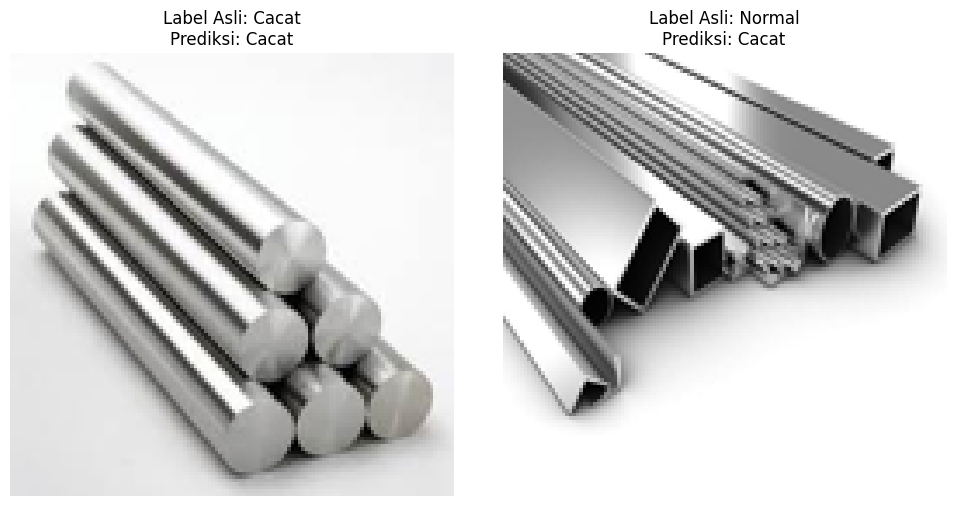

In [ ]:
# ======== STEP 1: Import Library =========
from google.colab import files
import numpy as np
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# ======== STEP 2: Upload Gambar =========
print("🔼 Upload 1 gambar logam CACAT...")
uploaded_cacat = files.upload()
if len(uploaded_cacat) != 1:
    raise ValueError("❌ Harap upload tepat 1 gambar CACAT.")
filename_cacat = next(iter(uploaded_cacat))

print("🔼 Upload 1 gambar logam NORMAL...")
uploaded_normal = files.upload()
if len(uploaded_normal) != 1:
    raise ValueError("❌ Harap upload tepat 1 gambar NORMAL.")
filename_normal = next(iter(uploaded_normal))

# ======== STEP 3: Preprocessing =========
img_size = (128, 128)
X, y, names = [], [], []

for filename, label in [(filename_cacat, 1), (filename_normal, 0)]:
    try:
        img = Image.open(filename).convert('RGB').resize(img_size)
        X.append(np.array(img) / 255.0)
        y.append(label)
        names.append(filename)
    except UnidentifiedImageError:
        raise ValueError(f"❌ File '{filename}' bukan gambar valid.")

X = np.array(X)
y = np.array(y)

# ======== STEP 4: Split Data =========
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

# ======== STEP 5: Bangun & Latih Model CNN =========
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

print("\n🚀 Melatih model...")
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=1, verbose=2)

# ======== STEP 6: Prediksi dan Visualisasi =========
print("\n📸 Membandingkan Gambar Logam Normal vs Cacat...")
preds = (model.predict(X) > 0.5).astype("int32")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.imshow(X[i])
    true_label = "Cacat" if y[i] == 1 else "Normal"
    pred_label = "Cacat" if preds[i][0] == 1 else "Normal"
    ax.set_title(f"Label Asli: {true_label}\nPrediksi: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()